- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train,
                                                            test_size = 0.2,
                                                            random_state = 12)

In [5]:
# 모델 정의
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = "relu"))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation = "softmax"))
    
    return model

In [6]:
model = model_fn()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")

In [8]:
history = model.fit(scaled_train, y_train, epochs = 5, verbose = 1)

Epoch 1/5


1500/1500 [==============================] - 3s 2ms/step - loss: 0.5406 - accuracy: 0.8108
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3575 - accuracy: 0.8723
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8780
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3216 - accuracy: 0.8839


- verbose
    - 훈련 과정 출력을 조정
    - 0 : 훈련 과정 출력 안함
    - 1 : 에포크마다 진행 막대와 함께 지표 출력
    - 2 : 진행 막대를 빼고 출력

In [9]:
# history 객체 확인
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy 를 추가하여서 loss 와 accuracy 가 포함됨

In [11]:
history.history

{'loss': [0.5405623912811279,
  0.3952702283859253,
  0.3575078845024109,
  0.33569493889808655,
  0.3215692639350891],
 'accuracy': [0.8107500076293945,
  0.8589166402816772,
  0.8722500205039978,
  0.878041684627533,
  0.8838541507720947]}

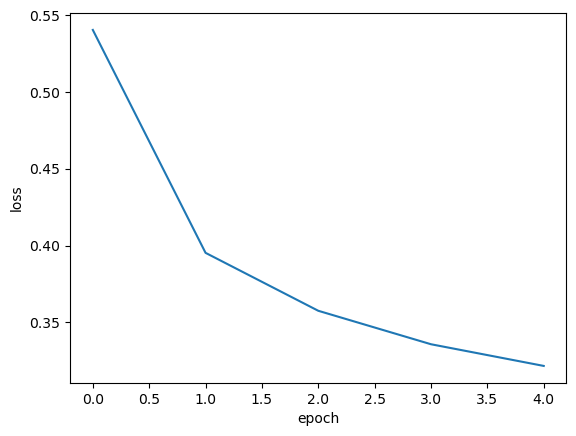

In [10]:
plt.figure()

plt.plot(history.history["loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

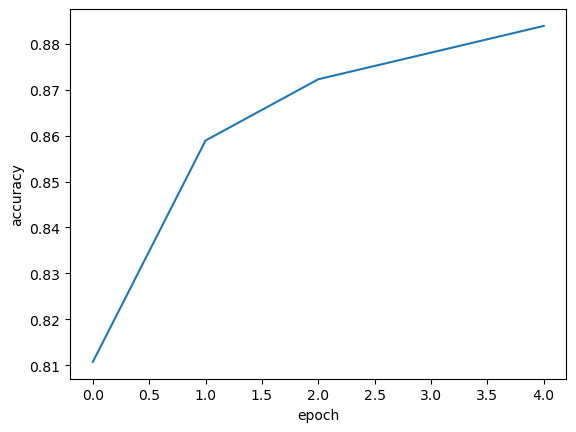

In [12]:
plt.figure()

plt.plot(history.history["accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [14]:
# epoch를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5356 - accuracy: 0.8121
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3950 - accuracy: 0.8566
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3577 - accuracy: 0.8725
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3352 - accuracy: 0.8796
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3198 - accuracy: 0.8850
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3097 - accuracy: 0.8894
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3023 - accuracy: 0.8915
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2930 - accuracy: 0.8958
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2835 - accuracy: 0.8990
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.277

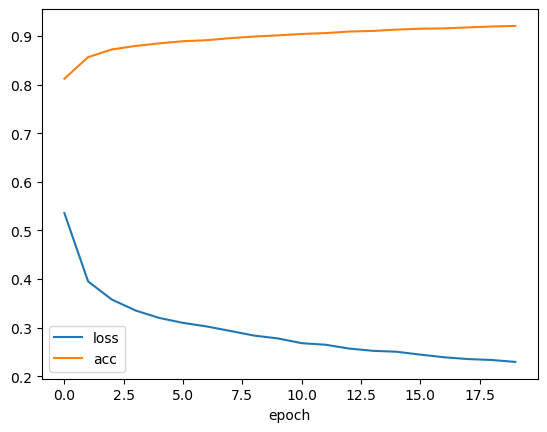

In [15]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [18]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, 
                    validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5357 - accuracy: 0.8130 - val_loss: 0.3934 - val_accuracy: 0.8613
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3955 - accuracy: 0.8591 - val_loss: 0.3706 - val_accuracy: 0.8696
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3583 - accuracy: 0.8703 - val_loss: 0.3683 - val_accuracy: 0.8692
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.8796 - val_loss: 0.3661 - val_accuracy: 0.8720
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3206 - accuracy: 0.8852 - val_loss: 0.3603 - val_accuracy: 0.8784
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3096 - accuracy: 0.8894 - val_loss: 0.3534 - val_accuracy: 0.8796
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.8938 - val_loss: 0.3646 - val_accuracy:

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
history.history

{'loss': [0.5356596112251282,
  0.3955417573451996,
  0.3583313822746277,
  0.33532777428627014,
  0.320646196603775,
  0.30957451462745667,
  0.29940029978752136,
  0.29108279943466187,
  0.28287267684936523,
  0.2760343551635742,
  0.2693551182746887,
  0.26415929198265076,
  0.25817400217056274,
  0.25627535581588745,
  0.25121381878852844,
  0.24258370697498322,
  0.24083958566188812,
  0.23589201271533966,
  0.23065312206745148,
  0.22715917229652405],
 'accuracy': [0.8130416870117188,
  0.8591458201408386,
  0.8702916502952576,
  0.8795833587646484,
  0.8852083086967468,
  0.8894374966621399,
  0.8938124775886536,
  0.8956041932106018,
  0.8991458415985107,
  0.9022499918937683,
  0.9054583311080933,
  0.9056666493415833,
  0.9094374775886536,
  0.9109166860580444,
  0.9123333096504211,
  0.9143333435058594,
  0.9147499799728394,
  0.9178333282470703,
  0.9197083115577698,
  0.9209583401679993],
 'val_loss': [0.39340195059776306,
  0.3705901801586151,
  0.36826151609420776,
  0.3

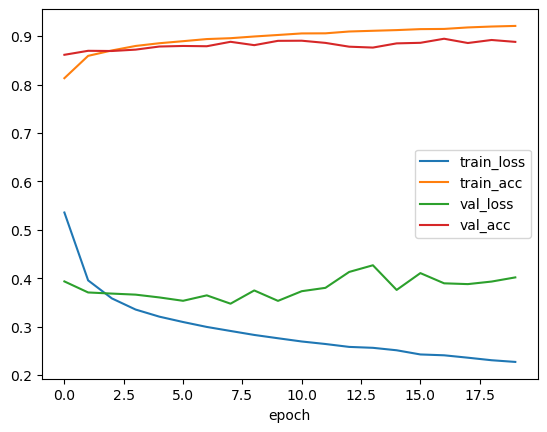

In [21]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [24]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5207 - accuracy: 0.8199 - val_loss: 0.4232 - val_accuracy: 0.8510
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3934 - accuracy: 0.8580 - val_loss: 0.3852 - val_accuracy: 0.8600
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8721 - val_loss: 0.3510 - val_accuracy: 0.8747
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3276 - accuracy: 0.8814 - val_loss: 0.3422 - val_accuracy: 0.8793
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3080 - accuracy: 0.8853 - val_loss: 0.3375 - val_accuracy: 0.8806
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2931 - accuracy: 0.8909 - val_loss: 0.3252 - val_accuracy: 0.8869
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8954 - val_loss: 0.3294 - val_accuracy:

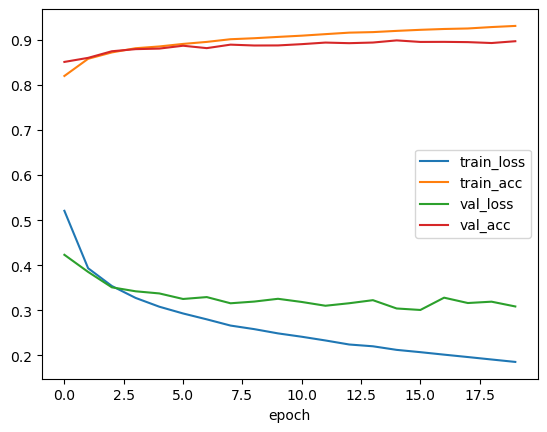

In [25]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- RMSPROP 을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropout)

<img src = "./image/dropout.png">

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
- 드롭아웃은 케라스에서 Dropout 클래스로 제공
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦
- Flatten과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터는 없음

In [26]:
model = model_fn(keras.layers.Dropout(0.3))  # 30% 드롭아웃
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 드롭아웃층은 입력과 출력의 크기가 같음
    - 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때에는 드롭아웃을 적용하지 않아야 함
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [27]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = "accuracy")

In [28]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6005 - accuracy: 0.7909 - val_loss: 0.4153 - val_accuracy: 0.8520
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4441 - accuracy: 0.8409 - val_loss: 0.3702 - val_accuracy: 0.8671
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4030 - accuracy: 0.8552 - val_loss: 0.3621 - val_accuracy: 0.8675
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8600 - val_loss: 0.3379 - val_accuracy: 0.8773
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3678 - accuracy: 0.8652 - val_loss: 0.3298 - val_accuracy: 0.8819
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3529 - accuracy: 0.8692 - val_loss: 0.3298 - val_accuracy: 0.8828
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3417 - accuracy: 0.8734 - val_loss: 0.3518 - val_accuracy:

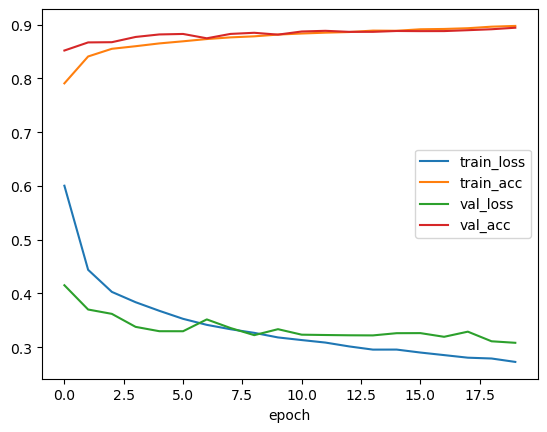

In [29]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨 

- val_loss 가 가장 낮은게 좋은거임

# 모델 저장과 복원

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 12, validation_data = (scaled_val, y_val))

Epoch 1/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5947 - accuracy: 0.7919 - val_loss: 0.4010 - val_accuracy: 0.8540
Epoch 2/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4412 - accuracy: 0.8407 - val_loss: 0.3972 - val_accuracy: 0.8526
Epoch 3/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4062 - accuracy: 0.8511 - val_loss: 0.3638 - val_accuracy: 0.8705
Epoch 4/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3854 - accuracy: 0.8596 - val_loss: 0.3569 - val_accuracy: 0.8703
Epoch 5/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3692 - accuracy: 0.8648 - val_loss: 0.3428 - val_accuracy: 0.8755
Epoch 6/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3552 - accuracy: 0.8680 - val_loss: 0.3374 - val_accuracy: 0.8795
Epoch 7/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3467 - accuracy: 0.8723 - val_loss: 0.3301 - val_accuracy:

- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 모델 구조와 모델 파라미터를 제공하는 save() 메서드도 제공

In [59]:
model.save("./model/model-whole.h5")

In [60]:
model.save_weights("./model/model-weights.h5")

## 모델 파라미터만 읽어오기

In [61]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("./model/model-weights.h5")

- load_weights() 메서드를 사용하면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야함 

In [62]:
val_labels = np.argmax(model.predict(scaled_val), axis = 1)

375/375 [==============================] - 0s 994us/step


In [63]:
val_labels

array([3, 0, 8, ..., 0, 7, 5], dtype=int64)

In [64]:
y_val   # 검증 데이터에 대한 정답값

array([3, 0, 8, ..., 0, 7, 5], dtype=uint8)

In [65]:
np.mean(val_labels == y_val)

0.8854166666666666

- 케라스의 predict() 메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어져 있기 때문에 각 클래스에 대한 확률을 반환
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번째 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음 
- argmax() 로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 True, 다르면 False
    - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [66]:
model = keras.models.load_model("./model/model-whole.h5")

In [67]:
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3204 - accuracy: 0.8854


[0.32035401463508606, 0.8854166865348816]

# 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit()메서드의 callbacks 매개변수에 리스트로 전달하여 사용

## ModelCheckpoint 콜백

- 최상의 검증 점수를 만드는 모델을 저장

In [6]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.h5", save_best_only = True)

In [9]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), callbacks = [checkpoint_cb])

Epoch 1/20


1500/1500 [==============================] - 4s 2ms/step - loss: 0.5959 - accuracy: 0.7900 - val_loss: 0.4233 - val_accuracy: 0.8471
Epoch 2/20
  67/1500 [>.............................] - ETA: 3s - loss: 0.4721 - accuracy: 0.8316

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 3s 2ms/step - loss: 0.4433 - accuracy: 0.8404 - val_loss: 0.3658 - val_accuracy: 0.8689
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4083 - accuracy: 0.8523 - val_loss: 0.3559 - val_accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3847 - accuracy: 0.8589 - val_loss: 0.3368 - val_accuracy: 0.8761
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3688 - accuracy: 0.8649 - val_loss: 0.3405 - val_accuracy: 0.8783
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3578 - accuracy: 0.8677 - val_loss: 0.3464 - val_accuracy: 0.8733
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3461 - accuracy: 0.8729 - val_loss: 0.3379 - val_accuracy: 0.8775
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8740 - val_loss: 0.3131 - val_accuracy: 0.8882
Epo

- 모델이 훈련한 후에 best-model.h5에 최상의 val_loss를 낸 모델이 저장됨

In [10]:
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8945


[0.31136131286621094, 0.8945000171661377]

In [11]:
model = keras.models.load_model("./model/best-model.h5")

In [12]:
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3087 - accuracy: 0.8960


[0.30868905782699585, 0.8960000276565552]

- ModelCheckpoint 콜백이 가장 낮은 검증 손실값의 모델을 자동으로 저장해주어 편하지만 여전히 20번의 훈련을 해야해서 불편함이 있음

## EarlyStopping 콜백

- 과대적합이 시작되기 전에(검증 점수가 상승할 때) 훈련을 미리 중지하는 것을 조기 종료(early stopping)라고 부름
- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나로 여겨지기도 함

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

- patience
    - 검증 점수가 향상되지 않더라도 지켜볼 에포크 횟수
    - patience 가 2라면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
    
- restore_best_weights
    - 가장 낮은 검증 손실을 낸 모델의 상태로 되돌림

In [14]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy",
             metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6010 - accuracy: 0.7872 - val_loss: 0.4070 - val_accuracy: 0.8518
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4492 - accuracy: 0.8381 - val_loss: 0.3787 - val_accuracy: 0.8616
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4126 - accuracy: 0.8494 - val_loss: 0.3710 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3877 - accuracy: 0.8580 - val_loss: 0.3427 - val_accuracy: 0.8759
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3709 - accuracy: 0.8637 - val_loss: 0.3421 - val_accuracy: 0.8777
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3614 - accuracy: 0.8661 - val_loss: 0.3279 - val_accuracy: 0.8830
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3503 - accuracy: 0.8714 - val_loss: 0.3220 - val_accuracy:

In [15]:
# 몇 번째 에포크에서 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

9


- 0부터 세니까 9

- 10번째 에포크까지 훈련한 후 중지됨
    - patience가 2이기 때문에 8번째 에포크 때의 모델이 최상의 모델임

In [16]:
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3208 - accuracy: 0.8863


[0.32075247168540955, 0.8862500190734863]

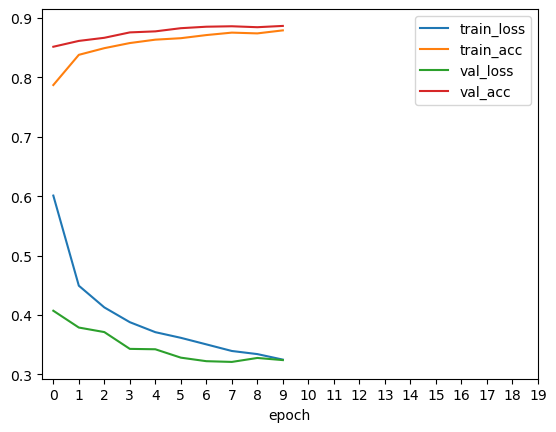

In [17]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xticks(ticks = range(20))
plt.legend()
plt.xlabel("epoch")
plt.show()

# validation_split

- 훈련 데이터를 자체적으로 훈련/검증 셋으로 나누어서 훈련/검증을 수행

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255
scaled_test = x_test / 255

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy",
             metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, validation_split = 0.2,
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5846 - accuracy: 0.7955 - val_loss: 0.4277 - val_accuracy: 0.8478
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4386 - accuracy: 0.8433 - val_loss: 0.3926 - val_accuracy: 0.8558
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8547 - val_loss: 0.3723 - val_accuracy: 0.8681
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8603 - val_loss: 0.3527 - val_accuracy: 0.8724
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3652 - accuracy: 0.8662 - val_loss: 0.3686 - val_accuracy: 0.8659
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3514 - accuracy: 0.8701 - val_loss: 0.3452 - val_accuracy: 0.8728
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3449 - accuracy: 0.8732 - val_loss: 0.3386 - val_accuracy:

In [21]:
import tensorflow as tf
tf.__version__

'2.15.0'